In [184]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [185]:
def next_power_of_two(n):
    return int(2 ** np.ceil(np.log2(n)))

In [186]:
def fft(signal):
    N = len(signal)
    padded_length = next_power_of_two(N)
    padded_signal = np.concatenate((signal, np.zeros(padded_length - N)))

    if padded_length <= 1:
        return padded_signal

    even_indices = np.arange(0, padded_length, 2)
    odd_indices = np.arange(1, padded_length, 2)
    even = padded_signal[even_indices]
    odd = padded_signal[odd_indices]

    even_fft = fft(even)
    odd_fft = fft(odd)

    exponent = np.exp(-2j * np.pi * np.arange(padded_length) / padded_length)
    half_fft = exponent[:padded_length // 2] * odd_fft

    result = np.zeros(padded_length, dtype=np.complex128)
    result[:padded_length // 2] = even_fft + half_fft
    result[padded_length // 2:] = even_fft - half_fft

    return result

In [187]:
sample_rate, signal = wavfile.read('C:/Users/Dell/Desktop/Multimedia Project/Sparsh.wav')
print(signal.shape)
print(signal)
signal = signal[:, 0]
print(signal.shape)
print(signal)

(946456, 2)
[[   0    0]
 [   0    0]
 [   0    0]
 ...
 [1204 1204]
 [1149 1149]
 [1098 1098]]
(946456,)
[   0    0    0 ... 1204 1149 1098]


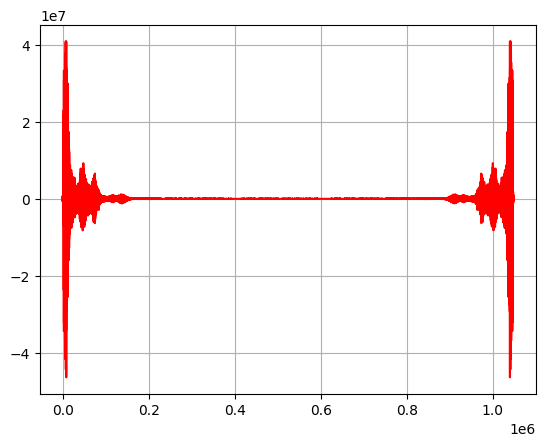

In [188]:
spectrum = fft(signal)
plt.plot(spectrum, color = 'Red')
plt.grid()

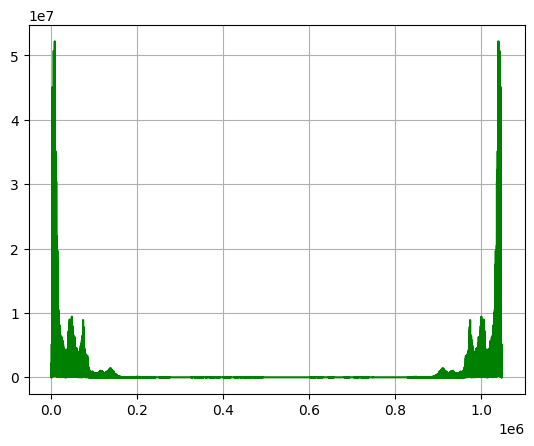

In [189]:
newspectrum = np.abs(spectrum)
plt.plot(newspectrum, color = 'Green')
plt.grid()

6291


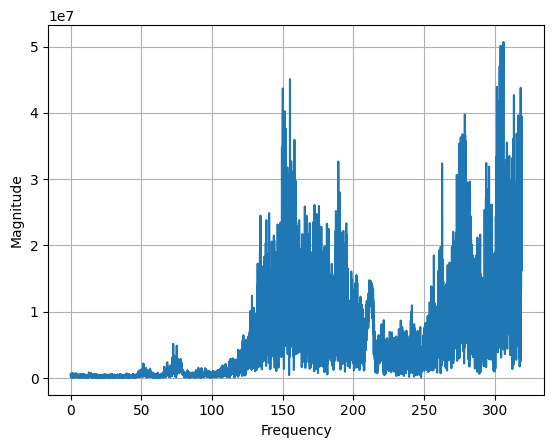

In [190]:
start_percentage = 0  # Starting percentage of the range
end_percentage = 0.006   # Ending percentage of the range
start_index = int(len(newspectrum) * start_percentage)
end_index = int(len(newspectrum) * end_percentage)
print(end_index)
duration = len(signal) / sample_rate
num_samples = len(signal)
freq_axis = np.linspace(0, sample_rate / 2, num_samples // 2 + 1)
plt.plot(freq_axis[start_index:end_index], newspectrum[start_index:end_index])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

In [191]:
print(spectrum.shape)
print(sample_rate)
print(signal.shape)
print(len(spectrum))
signal = np.concatenate((signal, np.zeros(len(spectrum) - len(signal))))

(1048576,)
48000
(946456,)
1048576
